# Logistic Regression

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Link for the dataset: https://www.kaggle.com/datasets/rouseguy/bankbalanced

# Cleaning and modifying data

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [56]:
# uploading dataset to juputer notebook
df = pd.read_csv("bank.csv")

In [57]:
# let's read data
df.head()

# I checked from this link https://archive.ics.uci.edu/dataset/222/bank+marketing
# what some of columns mean (their definition and values)

# default --> has credit in default? (binary: "yes","no")
# duration --> last contact duration, in seconds (numeric)
# campaign --> number of contacts performed during this campaign 
# and for this client (numeric, includes last contact)
# pdays --> number of days that passed by after the client was last contacted 
# from a previous campaign (numeric, -1 means client was not previously contacted)
# previous --> number of contacts performed before this campaign and for this client (numeric)
# poutcome --> outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [58]:
# let see how many values we have
# to compare them after the cleaning part
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

## My clean data plan:
1. Check all NaN values --> delete if there are 
2. Check duplicates --> delete if there are 
----------
3. Check the job column --> use clustering or other methods to modify it into numeric
4. marital column --> OneHotEncoder
5. education column --> OneHotEncoder
6. default column --> LabelEncoder
7. housing column --> LabelEncoder
8. loan column --> LabelEncoder
9. contact column --> OneHotEncoder 
10. month column --> use clustering or other methods to modify it into numeric
11. poutcome column --> OneHotEncoder 
12. deposit column --> LabelEncoder
----------
13. Remove outliers by checking balance of these columns

In [59]:
# 1. Check all NaN values --> delete if there are 
df.isna().sum()

# suprisingly, zero :)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [60]:
# 2. Check duplicates --> delete if there are 
# let's check whether we have duplicates
# or one more surprise awaiting us :)
df.duplicated().sum()

# yes, life is full of surprises :)

0

In [61]:
# 3. Check the job column --> use clustering or other methods to modify it into numeric

# type of job (categorical: 'admin.','blue-collar','entrepreneur',
# 'housemaid','management','retired','self-employed','services','student',
# 'technician','unemployed','unknown')

# overwriting the 'job' column with the encoded values

# the package that needed to be installed
# in order to modify data into numeric
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
label_encoder = LabelEncoder()

# fit LabelEncoder and transform 'job' column
df['job'] = label_encoder.fit_transform(df['job'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
admin.: 0
blue-collar: 1
entrepreneur: 2
housemaid: 3
management: 4
retired: 5
self-employed: 6
services: 7
student: 8
technician: 9
unemployed: 10
unknown: 11


In [62]:
# Modifying columns with OneHotEncoder
# 4. marital column --> OneHotEncoder

# fit LabelEncoder and transform 'job' column
df['marital'] = label_encoder.fit_transform(df['marital'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
divorced: 0
married: 1
single: 2


In [63]:
# 5. education column --> OneHotEncoder
df['education'] = label_encoder.fit_transform(df['education'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
primary: 0
secondary: 1
tertiary: 2
unknown: 3


In [64]:
# 9. contact column --> OneHotEncoder 
df['contact'] = label_encoder.fit_transform(df['contact'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
cellular: 0
telephone: 1
unknown: 2


In [65]:
# 11. poutcome column --> OneHotEncoder 
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

# Print the mapping of encoded values to original categories
# I will use these values for tester row and for GUI
print("Encoded values:")
for category, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {encoded_value}")

Encoded values:
failure: 0
other: 1
success: 2
unknown: 3


In [66]:
# verify the transformation
df.head()

age  job  marital  education default  balance housing loan  contact  day  \
0   59    0        1          1      no     2343     yes   no        2    5   
1   56    0        1          1      no       45      no   no        2    5   
2   41    9        1          1      no     1270     yes   no        2    5   
3   55    7        1          1      no     2476     yes   no        2    5   
4   54    0        1          2      no      184      no   no        2    5   

  month  duration  campaign  pdays  previous  poutcome deposit  
0   may      1042         1     -1         0         3     yes  
1   may      1467         1     -1         0         3     yes  
2   may      1389         1     -1         0         3     yes  
3   may       579         1     -1         0         3     yes  
4   may       673         2     -1         0         3     yes

In [67]:
# 10. month column --> use clustering or other methods to modify it into numeric
# Define a dictionary mapping each month to its numeric representation
month_to_number = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Map the 'month' column to its corresponding numeric representation
df['month'] = df['month'].map(month_to_number)

# I used this method in order to avoid creating additional columns

In [68]:
# checking whether everything worked in the correct way
df.head()

age  job  marital  education default  balance housing loan  contact  day  \
0   59    0        1          1      no     2343     yes   no        2    5   
1   56    0        1          1      no       45      no   no        2    5   
2   41    9        1          1      no     1270     yes   no        2    5   
3   55    7        1          1      no     2476     yes   no        2    5   
4   54    0        1          2      no      184      no   no        2    5   

   month  duration  campaign  pdays  previous  poutcome deposit  
0      5      1042         1     -1         0         3     yes  
1      5      1467         1     -1         0         3     yes  
2      5      1389         1     -1         0         3     yes  
3      5       579         1     -1         0         3     yes  
4      5       673         2     -1         0         3     yes

In [69]:
# All columns that need the same method can be done in one step
# 6. default column --> LabelEncoder
# 7. housing column --> LabelEncoder
# 8. loan column --> LabelEncoder
# 12. deposit column --> LabelEncoder

# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder
variables = ['default', 'housing', 'loan', 'deposit']
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [70]:
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      5      1042         1     -1         0         3        1  
1    5      5      1467         1     -1         0         3        1  
2    5      5      1389         1     -1         0         3        1  
3    5      5       579         1     -1         0         3        1  
4    5      5       673         2     -1         0         3        1

In [71]:
# 13. Remove outliers
df.describe()

age           job       marital     education       default  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948      4.487905      1.199337      1.285164      0.015051   
std       11.913369      3.225132      0.625552      0.749478      0.121761   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       49.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean    1528.538524      0.473123      0.130801      0.489697     15.658036   
std     3225.413326      0.499299      0.337198      0.818724      8.420740   
min    -6847.000000      0.000000      0.000000      0.000000      1.000000   
25%      122.000000      0.000000      0.000000      0.000000      8.000000   
50%      550.000000      0.000000      0.000000      0.000000     15.000000   
75%     1708.000000      1.000000      0.000000      1.000000     22.000000   
max    81204.000000      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean       6.190826    371.993818      2.508421     51.330407      0.832557   
std        2.572792    347.128386      2.722077    108.758282      2.292007   
min        1.000000      2.000000      1.000000     -1.000000      0.000000   
25%        5.000000    138.000000      1.000000     -1.000000      0.000000   
50%        6.000000    255.000000      2.000000     -1.000000      0.000000   
75%        8.000000    496.000000      3.000000     20.750000      1.000000   
max       12.000000   3881.000000     63.000000    854.000000     58.000000   

           poutcome       deposit  
count  11162.000000  11162.000000  
mean       2.477782      0.473840  
std        1.002952      0.499338  
min        0.000000      0.000000  
25%        2.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      1.000000  
max        3.000000      1.000000

In [72]:
# I have too many columns to check balannce of every column separetaly
# that is why I will use Z-score and IQR methods
# to check all columns at the same time

# Function to detect outliers using Z-score method
def detect_outliers_zscore(df, threshold=3):
    outliers = pd.DataFrame()
    for col in df.columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        col_outliers = df[z_scores > threshold][col]
        outliers = pd.concat([outliers, col_outliers], axis=1)
    return outliers

# Function to detect outliers using IQR method
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        col_outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)][col]
        outliers = pd.concat([outliers, col_outliers], axis=1)
    return outliers

# Detect outliers using Z-score method
outliers_zscore = detect_outliers_zscore(df)

# Detect outliers using IQR method
outliers_iqr = detect_outliers_iqr(df)

In [73]:
# Outliers detected using Z-score method
# NaN --> no outliers
# Number --> outlier, that is needed to be checked and removed
outliers_zscore

age  job  marital  education  default  balance  housing  loan  \
1236   85.0  NaN      NaN        NaN      NaN  12114.0      NaN   NaN   
1243   90.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1274   85.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1320   83.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1373   83.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1380   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1472   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1558   78.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1582   95.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1591   78.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1731   85.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2340   83.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2356   79.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2382   82.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2397   79.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2543   82.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2544   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2598   86.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2665   79.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2709   83.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2717   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2722   84.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2754   83.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2765   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2782   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2793   87.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2802   92.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2808   78.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2809   82.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2820   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2825   81.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2857   80.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2865   87.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2922   82.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2925   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2932   81.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2960   78.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3001   80.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3002   86.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3004   79.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3014   79.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3021   81.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3043   84.0  NaN      NaN        NaN      NaN  81204.0      NaN   NaN   
3067   87.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3087   85.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3088   79.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3098   92.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3099   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3101   81.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3116   80.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3130   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3144   78.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3156   80.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
3194   77.0  NaN      NaN        NaN      NaN      NaN      NaN   

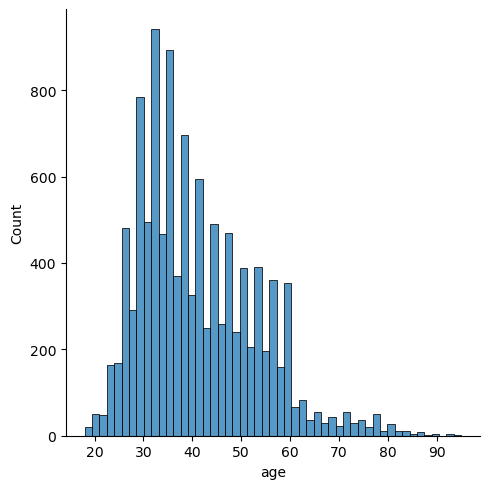

In [74]:
# remove outliers in age, balance, previous columns
# check outliers of age
sns.displot(df, x="age")

In [75]:
# let's remove everything that is considered as outliers
df = df.query("age > age.quantile(0.05) and age < age.quantile(0.75)")

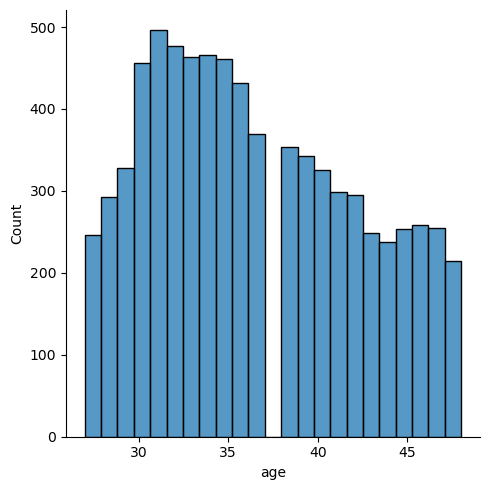

In [76]:
# data is not perfecrly balanced but it is better
# than it was before
sns.displot(df, x="age")

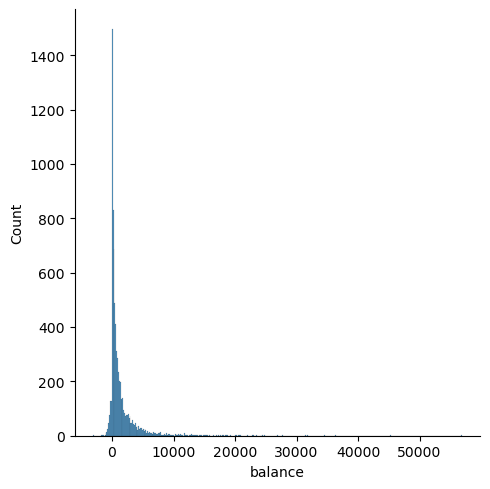

In [77]:
# let's check the balance column
sns.displot(df, x="balance")

In [78]:
# let's remove everything that is considered as outliers
df = df.query("balance > balance.quantile(0.001) and balance < balance.quantile(0.85)")

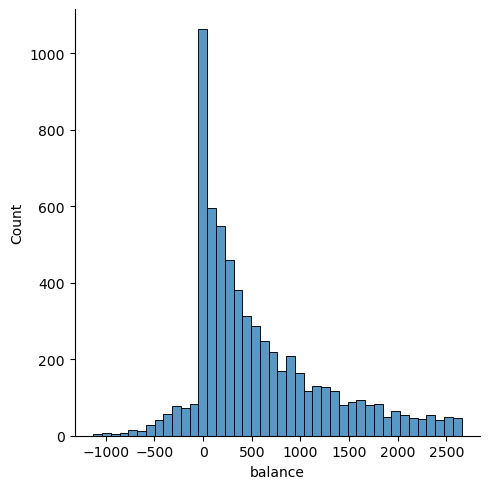

In [79]:
# data is not perfecrly balanced but it is better
# than it was before
sns.displot(df, x="balance")

In [80]:
# let's check the previous column
class_counts = df['previous'].value_counts()
class_counts

0     4849
1      496
2      385
3      238
4      137
5       97
6       69
7       37
8       32
10      17
9       15
11      12
12       8
17       8
13       5
15       4
19       3
14       3
16       2
58       1
22       1
55       1
23       1
30       1
27       1
41       1
18       1
37       1
20       1
Name: previous, dtype: int64

In [81]:
# let's remove outliers
# just a reminder, what "previous" means
# previous --> number of contacts performed before this campaign and for this client (numeric)
df = df.query("previous < previous.quantile(0.96)")

In [82]:
# now we deleted all clients who had
# a numerous amount of calls from the company
# it is an outlier because it can be viewed as
# an exception
class_counts = df['previous'].value_counts()
class_counts

0    4849
1     496
2     385
3     238
4     137
Name: previous, dtype: int64

In [83]:
# Outliers detected using IQR method
# NaN --> no outliers
# Number --> outlier, that is needed to be checked and removed
outliers_iqr

age  job  marital  education  default  balance  housing  loan  \
1162   75.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1236   85.0  NaN      NaN        NaN      NaN  12114.0      NaN   NaN   
1243   90.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1274   85.0  NaN      NaN        NaN      NaN   7613.0      NaN   NaN   
1320   83.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1371   76.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1373   83.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1380   77.0  NaN      NaN        NaN      NaN   9601.0      NaN   NaN   
1472   77.0  NaN      NaN        NaN      NaN   4659.0      NaN   NaN   
1487   76.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1558   78.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1582   95.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1591   78.0  NaN      NaN        NaN      NaN   8556.0      NaN   NaN   
1603   75.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1616   76.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
1731   85.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2340   83.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2356   79.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2382   82.0  NaN      NaN        NaN      NaN   8603.0      NaN   NaN   
2397   79.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2492   75.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2516   76.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2543   82.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2544   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2598   86.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2664   76.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2665   79.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2709   83.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2717   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2722   84.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2754   83.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2764   75.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2765   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2778   76.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2782   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2793   87.0  NaN      NaN        NaN      NaN   6746.0      NaN   NaN   
2797   76.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2802   92.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2808   78.0  NaN      NaN        NaN      NaN   4807.0      NaN   NaN   
2809   82.0  NaN      NaN        NaN      NaN   8603.0      NaN   NaN   
2811   76.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2820   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2823   76.0  NaN      NaN        NaN      NaN   4112.0      NaN   NaN   
2825   81.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2839   75.0  NaN      NaN        NaN      NaN   4984.0      NaN   NaN   
2857   80.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2865   87.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2885   76.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2922   82.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2925   77.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2931   76.0  NaN      NaN        NaN      NaN      NaN      NaN   NaN   
2932   81.0  NaN      NaN        NaN      NaN   5220.0      NaN   NaN   
2955   75.0  NaN      NaN        NaN      NaN   6027.0      NaN   NaN   
2960   78.0  NaN      NaN        NaN      NaN      NaN      NaN   

In [84]:
# remove outliers in poutcome

In [85]:
# let's check outliers in the "poutcome" column
# # poutcome --> outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"
# poutcome --> failure: 0, other: 1, success: 2, unknown: 3
class_counts = df['poutcome'].value_counts()
class_counts

3    4849
0     611
2     408
1     237
Name: poutcome, dtype: int64

In [86]:
# remove outliers
df = df.query('poutcome >= poutcome.quantile(q=0.2)')

In [87]:
# now we have lees of 
lass_counts = df['poutcome'].value_counts()
class_counts

3    4849
0     611
2     408
1     237
Name: poutcome, dtype: int64

In [88]:
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
2    41    9        1          1        0     1270        1     0        2   
5    42    4        2          2        0        0        1     1        2   
8    37    9        1          1        0        1        1     0        2   
10   38    0        2          1        0      100        1     0        2   
11   30    1        1          1        0      309        1     0        2   

    day  month  duration  campaign  pdays  previous  poutcome  deposit  
2     5      5      1389         1     -1         0         3        1  
5     5      5       562         2     -1         0         3        1  
8     6      5       608         1     -1         0         3        1  
10    7      5       786         1     -1         0         3        1  
11    7      5      1574         2     -1         0         3        1

In [89]:
df.describe()

age          job      marital    education      default  \
count  5257.000000  5257.000000  5257.000000  5257.000000  5257.000000   
mean     36.413924     4.396994     1.245387     1.295796     0.021305   
std       5.869317     3.361878     0.627783     0.696676     0.144413   
min      27.000000     0.000000     0.000000     0.000000     0.000000   
25%      32.000000     1.000000     1.000000     1.000000     0.000000   
50%      36.000000     4.000000     1.000000     1.000000     0.000000   
75%      41.000000     7.000000     2.000000     2.000000     0.000000   
max      48.000000    11.000000     2.000000     3.000000     1.000000   

           balance      housing         loan      contact          day  \
count  5257.000000  5257.000000  5257.000000  5257.000000  5257.000000   
mean    549.281149     0.537189     0.149515     0.602435    15.940460   
std     676.417829     0.498663     0.356629     0.894245     8.463755   
min   -1129.000000     0.000000     0.000000     0.000000     1.000000   
25%      51.000000     0.000000     0.000000     0.000000     8.000000   
50%     322.000000     1.000000     0.000000     0.000000    16.000000   
75%     882.000000     1.000000     0.000000     2.000000    22.000000   
max    2655.000000     1.000000     1.000000     2.000000    31.000000   

             month     duration     campaign        pdays     previous  \
count  5257.000000  5257.000000  5257.000000  5257.000000  5257.000000   
mean      6.103862   373.704584     2.705916    12.243485     0.162070   
std       2.336564   362.562261     3.013079    54.891297     0.631178   
min       1.000000     2.000000     1.000000    -1.000000     0.000000   
25%       5.000000   133.000000     1.000000    -1.000000     0.000000   
50%       6.000000   248.000000     2.000000    -1.000000     0.000000   
75%       8.000000   508.000000     3.000000    -1.000000     0.000000   
max      12.000000  3284.000000    43.000000   771.000000     4.000000   

          poutcome      deposit  
count  5257.000000  5257.000000  
mean      2.922389     0.401940  
std       0.267584     0.490337  
min       2.000000     0.000000  
25%       3.000000     0.000000  
50%       3.000000     0.000000  
75%       3.000000     1.000000  
max       3.000000     1.000000

# Converting data to X/y and checking multicollinearity by using VIF

In [90]:
# converting data to X/y
# a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('deposit', axis=1)
y = df['deposit']

In [91]:
# pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, confusing the logistic regression
vif_data

# "default," "balance," "loan," "contact," "campaign"
# --> are not highly correlated with each other

#  "age," "marital," "education," "day," "month," "duration," "pdays," "previous"
# --> higher levels of multicollinearity. 
# A VIF value above 10 is often considered problematic and may require further investigation.

# Notably, the "poutcome" feature has a very high VIF of 91.836809, 
# indicating a strong multicollinearity issue with other predictors in the model

feature        VIF
0         age  43.896544
1         job   2.868764
2     marital   5.751743
3   education   4.847461
4     default   1.053603
5     balance   1.740351
6     housing   2.492424
7        loan   1.221697
8     contact   1.681238
9         day   4.702551
10      month   8.217805
11   duration   2.085952
12   campaign   1.896917
13      pdays   2.219830
14   previous   2.363277
15   poutcome  73.536205

# Scaling the values

In [92]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [93]:
# initialize the scaler and process X-values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#  Creating the logistic regression and fitting the data

In [94]:
# logmodel = LogisticRegression()
# logmodel.fit(X_train, y_train)
# Model overall accuracy: 79.62%

logmodel = make_pipeline(StandardScaler(),
                         PolynomialFeatures(degree=2, include_bias=False), 
                         LogisticRegression(solver="sag"))

logmodel.fit(X_train, y_train)

NameError: name 'make_pipeline' is not defined

#  Classification error metrics

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# f1-score is 0.77 for the 1 class due to
# a slightly lower balance between precision and recall for class 1 compared to class 0.
# accuracy is 0.83
# I think it could be higher if we had mor balanced data

In [ ]:
# sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

# True Negative (TN) - False Positive (FP)
# False Negative (FN) - True Positive (TP)
print(confusion_matrix(y_test, predictions))

# It's crucial to assess the balance between 
# false positives and false negatives
# In my case, FP is almost doubled compared to FN

# I think, it is becuase unbalanced between positive 
# and negative outcome in the "deposit" column in the dataframe

In [ ]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary logistic regression, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multinomial logistic regression , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y, logmodel.predict_proba(X.values)[:, 1])

# 0.51 is not bad as it could be :)

# Testing the model with new data

In [ ]:
# I made a table with all enconded values
# in order to make a proccess of filling 
# the tester row easier

# Adjust display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Define the data as a dictionary
data = {
    'Feature': ['Job', 'Marital Status', 'Education Level', 'contact - Contact Method', 'Outcome of Previous Marketing Campaign', 'Month of Last Contact', 'default - Has Credit Default', 'housing - Has Housing Loan', 'loan - Has Personal Loan', 'deposit - Has the client subscribed a term deposit?'],
    'Description': ['Type of occupation: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown', 
                    'Marital status of the client: divorced, married, single', 
                    'Highest level of education: primary, secondary, tertiary, unknown', 
                    'Method of communication: cellular, telephone, unknown', 
                    'Outcome of previous marketing campaign: failure, other, success, unknown', 
                    'Month of last contact: jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec', 
                    'Has credit in default: yes, no', 
                    'Has housing loan: yes, no', 
                    'Has personal loan: yes, no', 
                    'Subscribed to term deposit: yes, no'],
    'Encoded Values': ['0 - admin., 1 - blue-collar, 2 - entrepreneur, 3 - housemaid, 4 - management, 5 - retired, 6 - self-employed, 7 - services, 8 - student, 9 - technician, 10 - unemployed, 11 - unknown', 
                       '0 - divorced, 1 - married, 2 - single', 
                       '0 - primary, 1 - secondary, 2 - tertiary, 3 - unknown', 
                       '0 - cellular, 1 - telephone, 2 - unknown', 
                       '0 - failure, 1 - other, 2 - success, 3 - unknown', 
                       '1 - jan, 2 - feb, 3 - mar, 4 - apr, 5 - may, 6 - jun, 7 - jul, 8 - aug, 9 - sep, 10 - oct, 11 - nov, 12 - dec', 
                       '0 - yes, 1 - no', 
                       '0 - yes, 1 - no', 
                       '0 - yes, 1 - no', 
                       '0 - yes, 1 - no']
}

# Create a DataFrame
table_with_encoded_values = pd.DataFrame(data)

# Display the DataFrame without index
display(table_with_encoded_values.style.hide_index())


In [ ]:
# display df to see values
# it makes the process of filling the tester row easier
df.head()

# campaign - number of contacts performed during this campaign and for this client
# pdays - number of days that passed by after the client was last contacted 
# from a previous campaign (numeric; -1 means client was not previously contacted)	

In [ ]:
# display all columns in order to copy paste them
# into the a tester row
df.columns

In [ ]:
# just for a reminder what these columns mean:

# default --> has credit in default? (binary: "yes","no")
# duration --> last contact duration, in seconds (numeric)
# campaign --> number of contacts performed during this campaign 
# and for this client (numeric, includes last contact)
# pdays --> number of days that passed by after the client was last contacted 
# from a previous campaign (numeric, -1 means client was not previously contacted)
# previous --> number of contacts performed before this campaign and for this client (numeric)
# poutcome --> outcome of the previous marketing campaign (categorical: "unknown","other","failure","success"

# Gender -> 0 => Female, 1 => Male
tester_row = {
    'age': 25, 
    'job': 2, 
    'marital': 1, 
    'education': 2, 
    'default': 1, 
    'balance': 5000, 
    'housing': 0,
    'loan': 0, 
    'contact': 1, 
    'day': 5, 
    'month': 2, 
    'duration': 120, 
    'campaign': 1, 
    'pdays': -1,
    'previous': 0, 
    'poutcome': 3, 
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print(logmodel.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Did this customer take a deposit (Yes/No):")
result = labels[logmodel.predict(tester_row)[0]]
print(result)
print("-------------------")

In [ ]:
df.head()

In [ ]:
# I need to rename all columns because it is really to orientate
# in these all names
df = df.rename(columns={'default': 'failed_previous_credit', 
                        'housing': 'housing_loan',
                        'contact': 'contact_type',
                        'duration': 'contact_duration_sec',
                        'campaign': 'number_of_contacts',
                        'pdays': 'days_since_last_contact',
                        'previous': 'previous_number_of_contacts',
                        'deposit': 'subscribed_deposit',})

In [ ]:
# now it is easier to understand meaning of columns
df.head()

# Analysis

In [ ]:
I would change name of columns

Values:
job
Encoded values:
admin.: 0
blue-collar: 1
entrepreneur: 2
housemaid: 3
management: 4
retired: 5
self-employed: 6
services: 7
student: 8
technician: 9
unemployed: 10
unknown: 11


marital
divorced: 0
married: 1
single: 2

education
primary: 0
secondary: 1
tertiary: 2
unknown: 3

contact
cellular: 0
telephone: 1
unknown: 2

poutcome
failure: 0
other: 1
success: 2
unknown: 3

month
'jan': 1,
'feb': 2,
'mar': 3,
'apr': 4,
'may': 5,
'jun': 6,
'jul': 7,
'aug': 8,
'sep': 9,
'oct': 10,
'nov': 11,
'dec': 12

default
yes: 1
no: 0

housing
yes: 1
no: 0

loan
yes: 1
no: 0

deposit
yes: 1
no: 0